In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Lok+Sabha_2019.csv')

In [3]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


# 1. Which State/UT contributes to the least number of total votes? Which State/UT contributes to the most number of total votes?

In [4]:
# groupby dataframe with one new col
dfnew=pd.DataFrame(df.groupby("STATE")["TOTAL VOTES"].sum()).reset_index()# series
dfnew['%vote']=dfnew["TOTAL VOTES"]/dfnew["TOTAL VOTES"].sum()*100 # series
dfnew.sort_values(by="TOTAL VOTES",ascending=False).reset_index(drop=True)

,STATE,TOTAL VOTES,%vote
0,Uttar Pradesh,83732192,14.20
1,West Bengal,55414939,9.39
2,Maharashtra,52011437,8.82
3,Tamil Nadu,40629837,6.89
4,Bihar,38051064,6.45
5,Madhya Pradesh,35366613,6.00
6,Karnataka,33789397,5.73
7,Rajasthan,31481301,5.34
8,Andhra Pradesh,30544833,5.18
9,Gujarat,27823175,4.72


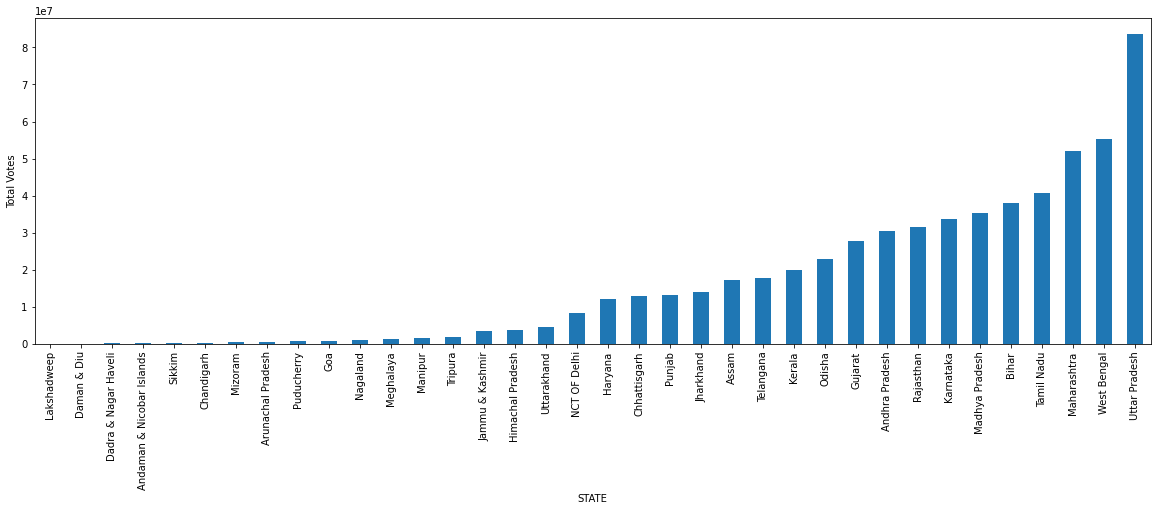

In [5]:
plt.figure(figsize=(20,6))
df.groupby("STATE")["TOTAL VOTES"].sum().sort_values().plot(kind='bar');
plt.ylabel("Total Votes");

Inference:-
1. State/UT contributes to the least number of total votes is Lakshadweep. Total votes is 46221 i.e 0.01% of total votes
2. State/UT contributes to the most number of total votes is Uttar Pradesh Total Votes is 83732192 i.e 14.20% of total votes

In [6]:
# using pivot table
table=pd.pivot_table(df,'TOTAL VOTES',index=['STATE'],aggfunc='sum')
table['% Vote'] = (table['TOTAL VOTES']/table['TOTAL VOTES'].sum())*100
table.sort_values(by='TOTAL VOTES',ascending=False)

,TOTAL VOTES,% Vote
STATE,,
Uttar Pradesh,83732192,14.20
West Bengal,55414939,9.39
Maharashtra,52011437,8.82
Tamil Nadu,40629837,6.89
Bihar,38051064,6.45
Madhya Pradesh,35366613,6.00
Karnataka,33789397,5.73
Rajasthan,31481301,5.34
Andhra Pradesh,30544833,5.18


# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [7]:
#using pivot table
table=pd.pivot_table(df,'ASSETS',index=["CONSTITUENCY"],aggfunc='mean')
table.sort_values(by='ASSETS',ascending=False)

,ASSETS
CONSTITUENCY,
CHEVELLA,3927395902.00
CHHINDWARA,1655144708.25
GUNA,1296719487.00
NELLORE,1289469814.67
BANGALORE RURAL,1230421937.67
...,...
BOLPUR,4090779.40
ALIPURDUARS,3895905.50
GAYA (SC),3796683.45


In [8]:
# using groupby function
df.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values()

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

inference:-

- Candidates from ALATHUR constituency on an average seems to contribute least towards the amount of assets declared with an avg amount of approx. 2.2 mln rupees
- Candidates from CHEVELLA constituency on an average seems to contribute most towards the amount of assets declared with an avg amount of approx. 3.9 bln rupees

# 3. Consider assets and liabilities. Describe and explain both across the Education level? Provide a detailed justification for your answer.

In [9]:
#table=pd.pivot_table(df,values=['ASSETS','LIABILITIES'],index=["EDUCATION"],aggfunc=["mean","sum"])
table=pd.pivot_table(df, index=[ 'EDUCATION'],values=['ASSETS','LIABILITIES'], aggfunc=["mean","sum"])
table

mean                         sum               
                    ASSETS LIABILITIES          ASSETS    LIABILITIES
EDUCATION                                                            
Basic Level   113087357.14 21598924.78  66495365996.00 12700167770.00
Doctorate     163789131.21  8972111.25  11956606578.00   654964121.00
Graduate      147467337.18 18852620.89 114434653649.00 14648486430.00
Illiterate    124500820.24 19511916.51   6847545113.00  1073155408.00
Post Graduate 130823318.28 21383130.71  65804129095.00 10755714746.00

In [10]:
df_asset = df.groupby('EDUCATION')['ASSETS']
df_asset_des = df_asset.describe().T
df_asset_des.loc[('Total'), :] = df_asset.sum()
df_asset_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00


C:\Users\priyanka\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\priyanka\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


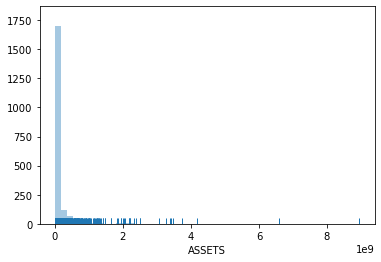

In [11]:
# draw histogram for asset of each education group
sns.distplot(df["ASSETS"],kde=False,rug=True);

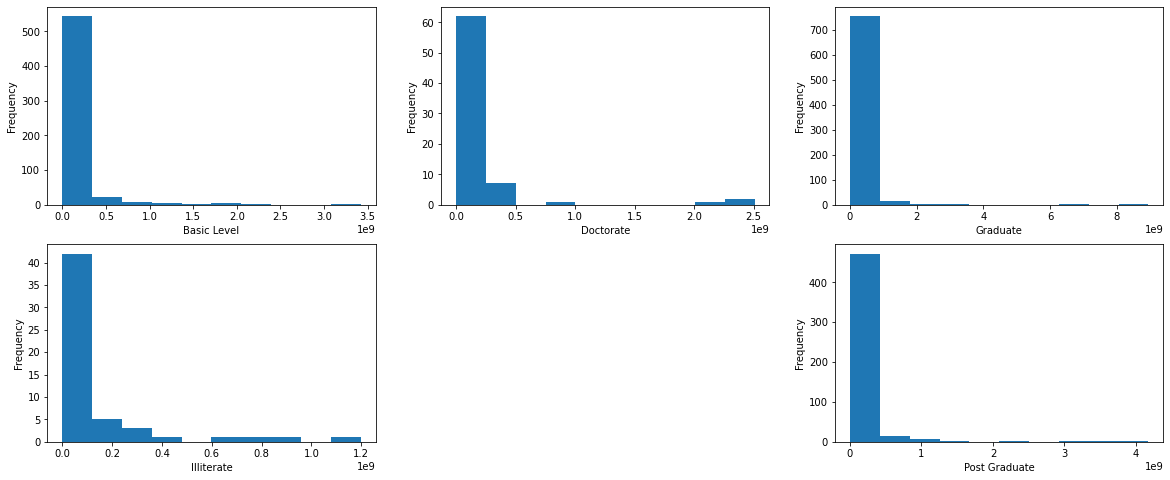

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df_asset.get_group('Basic Level').plot(kind = 'hist')
plt.xlabel('Basic Level')
plt.subplot(2,3,2)
df_asset.get_group('Doctorate').plot(kind = 'hist')
plt.xlabel('Doctorate')
plt.subplot(2,3,3)
df_asset.get_group('Graduate').plot(kind = 'hist')
plt.xlabel('Graduate')
plt.subplot(2,3,4)
df_asset.get_group('Illiterate').plot(kind = 'hist')
plt.xlabel('Illiterate')
plt.subplot(2,3,6)
df_asset.get_group('Post Graduate').plot(kind = 'hist')
plt.xlabel('Post Graduate');

In [13]:
df_lia = df.groupby('EDUCATION')['LIABILITIES']
df_lia_des = df_lia.describe().T
df_lia_des.loc[('Total'), :] = df_lia.sum()

In [14]:
df_lia_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,777.00,55.00,503.00
mean,21598924.78,8972111.25,18852620.89,19511916.51,21383130.71
std,99416300.01,25885435.30,74590853.58,73095280.61,106208631.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,500000.00,1127000.00,1387000.00,1935504.00,980000.00
75%,4575793.25,2623964.00,7450651.00,7845260.50,6474886.00
max,1350000000.00,137800000.00,1079582000.00,534644785.00,1547511439.00
Total,12700167770.00,654964121.00,14648486430.00,1073155408.00,10755714746.00


# 4. Are there any outliers in assets and liabilities across Education level? Back up your answer with a suitable plot/technique.

<Figure size 1080x720 with 0 Axes>

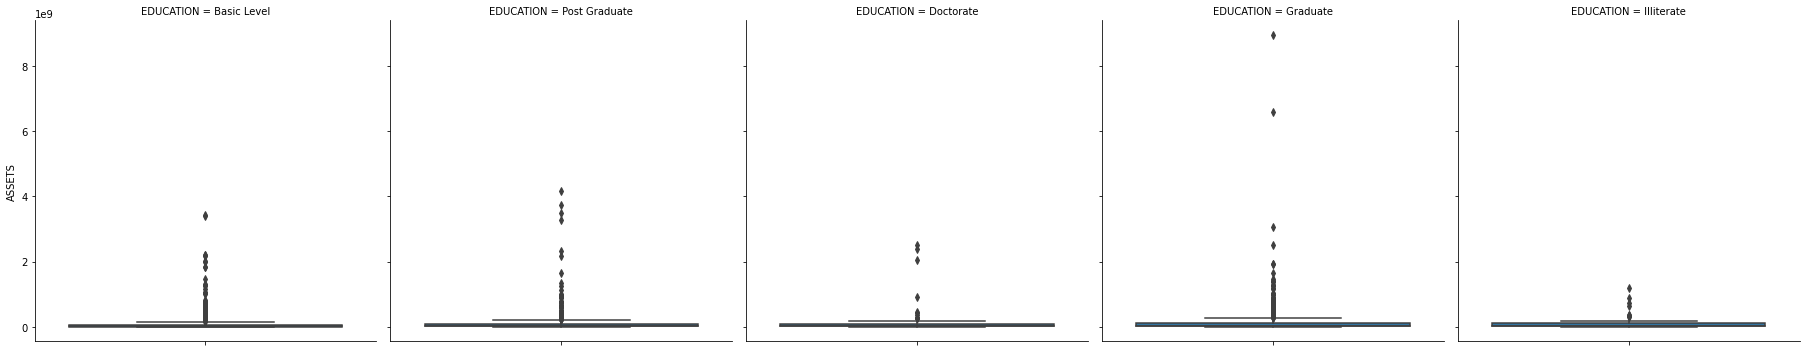

In [15]:
plt.figure(figsize=(15,10));
sns.catplot(data=df,y='ASSETS',col='EDUCATION',kind='box',ci=False);

Text(0.5, 0, 'Post Graduate')

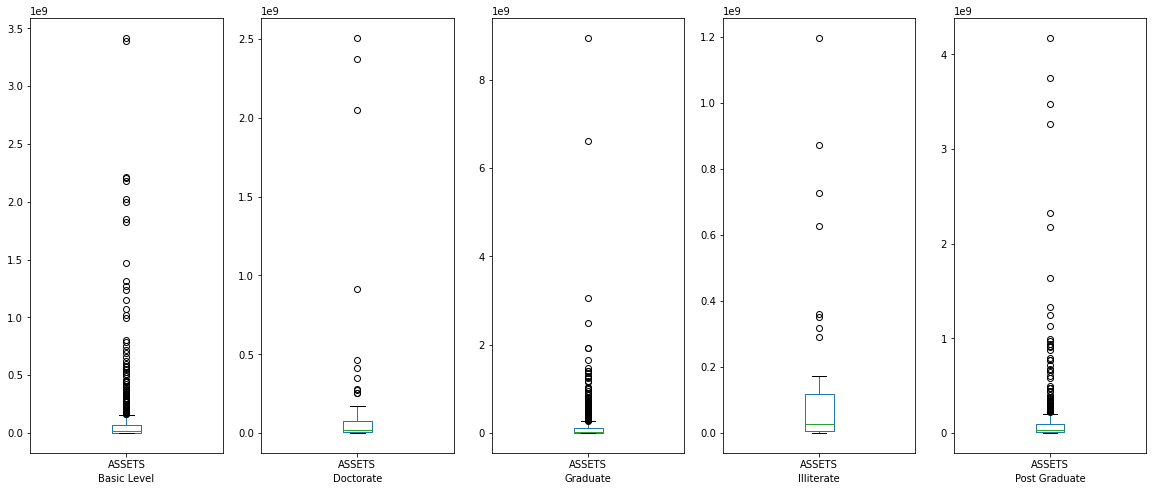

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
df_asset.get_group('Basic Level').plot(kind = 'box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_asset.get_group('Doctorate').plot(kind = 'box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_asset.get_group('Graduate').plot(kind = 'box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_asset.get_group('Illiterate').plot(kind = 'box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_asset.get_group('Post Graduate').plot(kind = 'box')
plt.xlabel('Post Graduate')

Text(0.5, 0, 'Post Graduate')

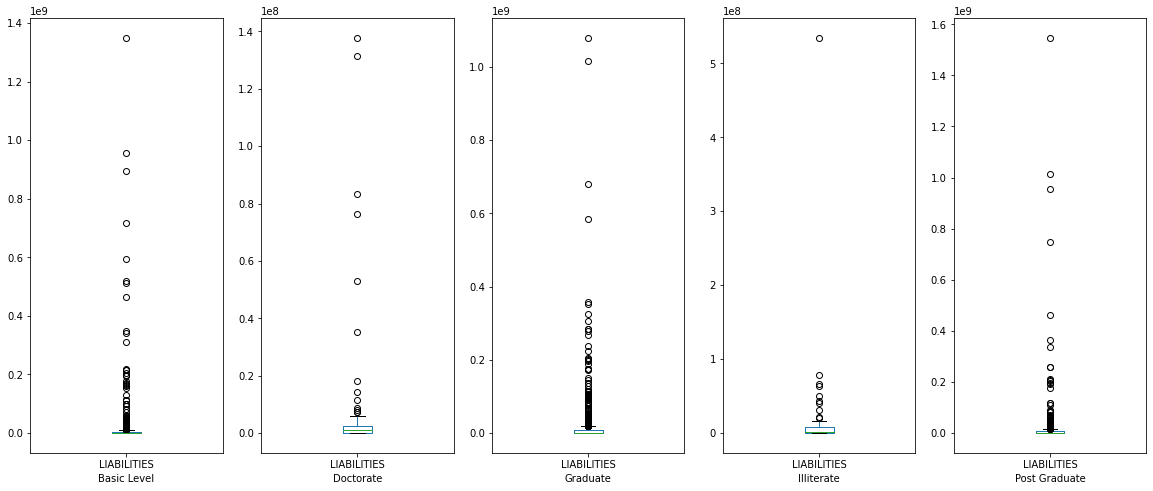

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
df_lia.get_group('Basic Level').plot(kind = 'box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_lia.get_group('Doctorate').plot(kind = 'box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_lia.get_group('Graduate').plot(kind = 'box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_lia.get_group('Illiterate').plot(kind = 'box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_lia.get_group('Post Graduate').plot(kind = 'box')
plt.xlabel('Post Graduate')

# 5. On the basis of the descriptive measure of variability, candidates with what education level shows the most and the least inconsistent behavior in the declared assets?